In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import LSTM, Dense

### Data Reading

In [57]:
data = pdr.get_data_tiingo('AAPL', api_key='b159810f6a94239952a09970a20f1877abfe0b21')

In [58]:
data.to_csv('/home/hasan/DATA SET/AAPL.csv')

### Data Loading

In [59]:
data = pd.read_csv('/home/hasan/DATA SET/AAPL.csv')

In [60]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
1,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
2,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
3,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
4,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0


In [61]:
data.shape

(1257, 14)

### Close column

In [62]:
data = data['close']

In [63]:
data.head()

0    130.535
1    129.960
2    130.120
3    129.360
4    128.650
Name: close, dtype: float64

In [64]:
data.shape

(1257,)

Text(0.5, 1.0, 'original data')

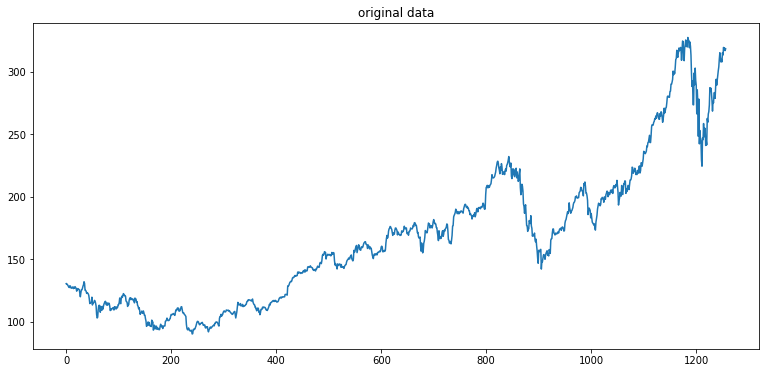

In [65]:
plt.figure(figsize=(13,6))
plt.plot(data)
plt.title('original data')

### Data Preprocessing

In [66]:
#reshaping data
data = np.array(data).reshape(-1,1)

In [67]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data)

### dividing dataset into train, test

In [68]:
train_size = int(len(data)*.70)
test_size = len(data)-train_size

train = data[:train_size,:]
test = data[train_size:, :]

In [69]:
print('Shape of train :',train.shape)
print('Shape of test :',test.shape)

Shape of train : (879, 1)
Shape of test : (378, 1)


### Feature and Label Data

In [70]:
def feature_label_data(data, time_step=1):
    feature = []
    label = []
    for i in range(len(data)-time_step-1):
        f = data[i:(i+time_step), 0]
        l = data[i+time_step,0]
        feature.append(f)
        label.append(l)
        
    return np.array(feature), np.array(label)



In [71]:
time_step=100
trainX,trainY = feature_label_data(train, time_step)
testX,testY = feature_label_data(test, time_step)
print('Shape of trainX is :',trainX.shape)
print('Shape of trainY is :',trainY.shape)
print('Shape of testX is :',testX.shape)
print('Shape of testY is :',testY.shape)

Shape of trainX is : (778, 100)
Shape of trainY is : (778,)
Shape of testX is : (277, 100)
Shape of testY is : (277,)


### Reshaping Data

In [72]:
trainX = trainX.reshape(trainX.shape[0], trainX.shape[1], 1)
testX = testX.reshape(testX.shape[0], testX.shape[1], 1)

### Model

In [73]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(40))
model.add(Dense(1))

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_5 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_6 (LSTM)                (None, 40)                14560     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 45,201
Trainable params: 45,201
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [76]:
fit_history = model.fit(trainX,trainY, batch_size=64, epochs=200, validation_data=(testX,testY), verbose=1)

Train on 778 samples, validate on 277 samples
Epoch 1/200
778/778 [==============================] - 4s 5ms/step - loss: 0.0211 - val_loss: 0.0586
Epoch 2/200
778/778 [==============================] - 2s 3ms/step - loss: 0.0042 - val_loss: 0.0053
Epoch 3/200
778/778 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 0.0043
Epoch 4/200
778/778 [==============================] - 2s 3ms/step - loss: 9.1356e-04 - val_loss: 0.0060
Epoch 5/200
778/778 [==============================] - 2s 3ms/step - loss: 8.3653e-04 - val_loss: 0.0086
Epoch 6/200
778/778 [==============================] - 2s 3ms/step - loss: 7.4618e-04 - val_loss: 0.0072
Epoch 7/200
778/778 [==============================] - 2s 3ms/step - loss: 7.0658e-04 - val_loss: 0.0067
Epoch 8/200
778/778 [==============================] - 3s 4ms/step - loss: 6.8213e-04 - val_loss: 0.0064
Epoch 9/200
778/778 [==============================] - 3s 4ms/step - loss: 6.7279e-04 - val_loss: 0.0071
Epoch 10/200
778/778 

### prediction and performance matrix

In [77]:
trainX_predict = model.predict(trainX) 
testX_predict = model.predict(testX)

In [78]:
#backing to original data
trainX_predict = scaler.inverse_transform(trainX_predict)
testX_predict = scaler.inverse_transform(testX_predict)

In [79]:
trainX_predict.shape

(778, 1)

In [80]:
testX_predict.shape

(277, 1)

### Root mean squared error(RMSE) performance matrix

In [81]:
#RMSE for train data
math.sqrt(mean_squared_error(trainY, trainX_predict))

151.75453400937778

In [82]:
#RMSE for test data
math.sqrt(mean_squared_error(testY, testX_predict))

252.5780489767932

### plotting train and test data

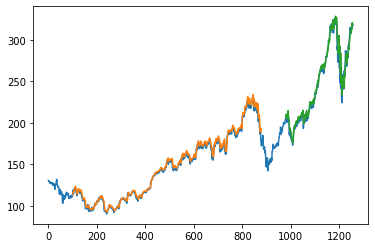

In [83]:
### Plotting 
# shift train predictions for plotting
#look_back=100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainX_predict)+time_step, :] = trainX_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainX_predict)+(time_step*2)+1:len(data)-1, :] = testX_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Predicting next 30 days share

In [84]:
#len of test data
len(test)

378

In [85]:
x_input = test[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [86]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.8232711306256861,
 0.7814320695769654,
 0.66659630161276

In [87]:
lst_output=[]
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, time_step, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, time_step,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print("\n\n 30 day's output are :",lst_output)

[0.9712267]
101
1 day input [0.88431985 0.87836697 0.8986321  0.92582116 0.92877649 0.95676771
 0.93869797 0.93304061 0.94950604 0.96424048 0.95512117 0.95989192
 0.96635143 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106
 0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.9

In [88]:
day_new = np.arange(1,101)
day_predict = np.arange(101, 131)

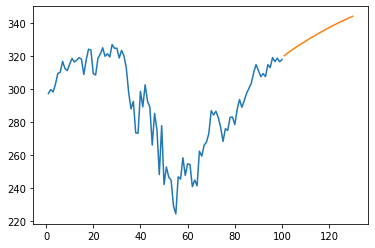

In [89]:
plt.plot(day_new, scaler.inverse_transform(data[1157:]))
plt.plot(day_predict, scaler.inverse_transform(lst_output))

In [90]:
len(data)

1257

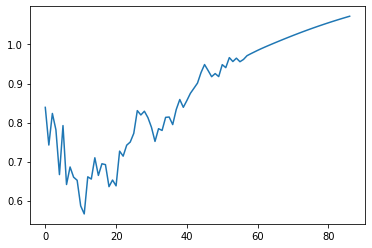

In [91]:
#adding new data
new_add = data.tolist()
new_add.extend(lst_output)
plt.plot(new_add[1200:])

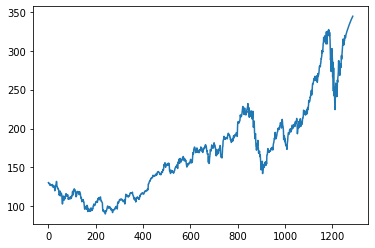

In [92]:
#full data(with 30 day parediction)
plt.plot(scaler.inverse_transform(new_add))